In [2]:

import os
import sys
import matplotlib.pyplot as plt
import numpy as np

# Get the absolute path of the parent directory of the current file (which is 'test')
# current_dir = os.getcwd()
# model_path = os.path.join(current_dir, '..', 'model')
# sys.path.append(model_path)
sys.path.append('..')

from model.Force import HullForce, ControlForce, TowingForce
from model.RigidBody import RigidBody
from model.Simulation import Simulation, Simulation_Result

In [7]:
# Set parameters
m = 0.877 # kg
Vol = 733159.45810955 * 10 ** (-9) #m3
Iyy = 6610.17475482 * 10 ** (-6) * 10 ** (3) #kgm2
hull_surface_area = 0.05 #m2

r_xi = -111.76 * 10 ** (-3) #m 
r_zi = 0.722 * 10 ** (-3) #m

r_xh = -0.01
r_zh = 0.01

r_xb = 0
r_zb = 0

r_xt = 42.9 * 10**(-3)
r_zt = -35 * 10**(-3)

rho = 1000 #kg/m3

# Aero foil parameters
AR = 2.61 #aspect ratio
area = 0.025 #Surface area
C_L_a = 0.1/np.deg2rad(1)
C_L_alpha_offset = 0.5
C_D_0 = 0.02



In [8]:
rigidbody = RigidBody(m, Vol, Iyy, np.array([r_xb, r_zb]))
towForce = TowingForce(np.array([r_xt,r_zt]),10,np.deg2rad(30))
controlForce = ControlForce(np.array([r_xi,r_zi]),np.deg2rad(-5),AR,area,C_L_a,C_L_alpha_offset,C_D_0)
hullForce = HullForce(hull_surface_area,np.array([r_xh,r_zh]))

sim = Simulation(rigidbody,towForce,hullForce,[controlForce])


0.0


In [9]:
results_LS = sim.solve_equilibrium_state_LS(2)

Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -4.74           degrees   
Delta_t         14.86           degrees   
Towing Force    95.74           N         
Delta_i         5.15            degrees   
----------------------
Fx:             -0.00          N         
Fz:             0.00           N         
My:             -0.00          Nm        
Residual Norm: 0.000000
Optimization successful!


In [43]:
print(rigidbody.tow_force.magnitude)
print(np.cos(rigidbody.tow_force.delta_t))
print()

95.77817630593255
0.9662996102191513



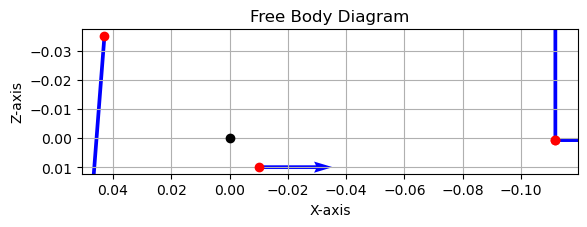

In [12]:


# Define forces with their points of application (relative to origin)
forces = [
    {"point": (r_xi, r_zi), "vector": (0, controlForce.magnitude[1])},  # Control lift
    {"point": (r_xi, r_zi), "vector": (-controlForce.magnitude[0], 0)},   #control drag
    {"point": (r_xh, r_zh), "vector": (-controlForce.magnitude[0], 0)},  #hull drag
    {"point": (r_xt, r_zt), "vector": (rigidbody.tow_force.magnitude*np.cos(rigidbody.tow_force.magnitude),
                                       rigidbody.tow_force.magnitude*np.sin(rigidbody.tow_force.magnitude) )}   #hull drag
    

    
]

# Set up plot
fig, ax = plt.subplots()
ax.set_aspect('equal')


# Plot forces as arrows
ax.plot(0, 0, 'ko')
for force in forces:
    point = force["point"]
    vector = force["vector"]
    ax.quiver(point[0], point[1], vector[0], vector[1], angles='xy', scale_units='xy', scale=100, color='blue')
    ax.plot(point[0], point[1], 'ro')  # Mark the point of application

ax.invert_xaxis()  # Flip x-axis appearance
ax.invert_yaxis()  # Flip y-axis appearance
# Optional: Add grid, labels, and title
plt.grid(True)
plt.xlabel('X-axis')
plt.ylabel('Z-axis')
plt.title('Free Body Diagram')

plt.show()


In [52]:
print(forces)

[{'point': (-0.11176000000000001, 0.000722), 'vector': (0, -23.24414370201756)}, {'point': (-0.11176000000000001, 0.000722), 'vector': (2.550414399830927, 0)}, {'point': (-0.01, 0.01), 'vector': (2.550414399830927, 0)}, {'point': (0.0429, -0.03518), 'vector': (3.8683502710612774, 95.70002571927908)}]
